In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
##drop month ,day and year columns
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [17]:
##encoding the target variable
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [21]:
## independent and dependent variables
X = df.drop('FWI', axis=1)
y= df['FWI']

In [22]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [23]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [24]:
## train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  



In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

<Axes: >

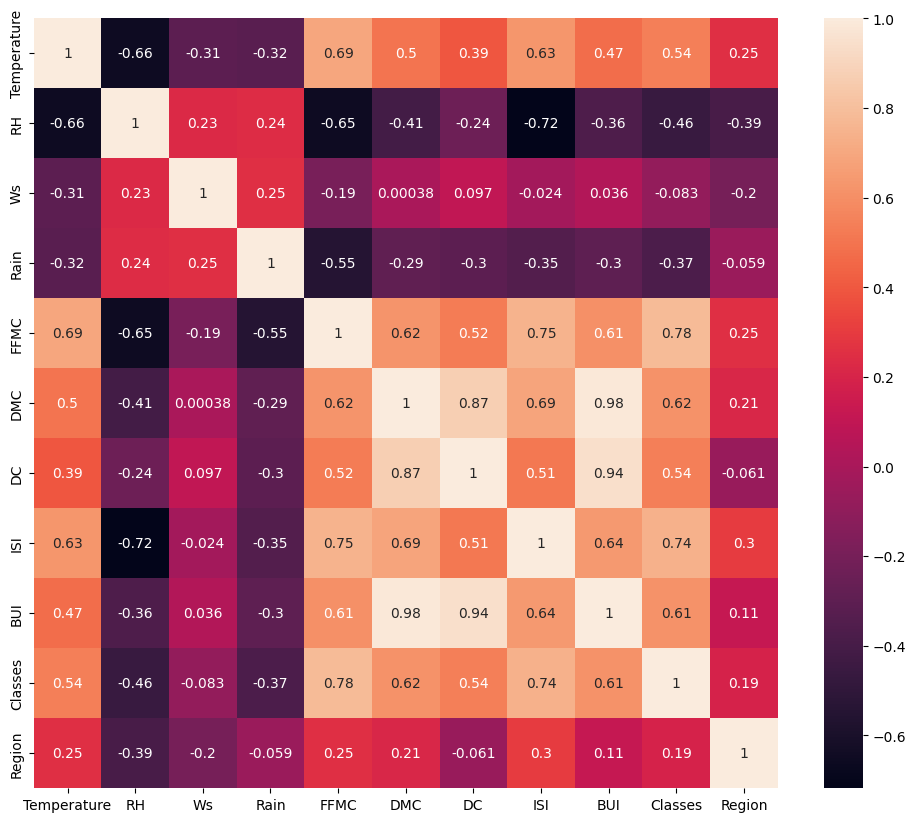

In [26]:
##check for mullticollinearity
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features=correlation(X_train, 0.85)

In [35]:
##drop these features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [36]:
##Feature scalling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'Box plot of scaled training data after scaling')

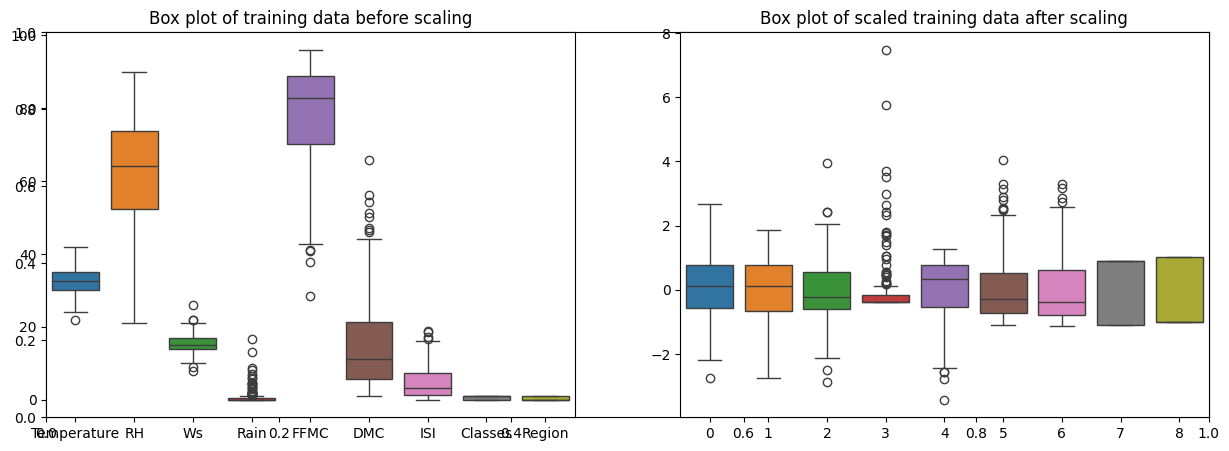

In [38]:
##box plot to check for outliers
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Box plot of training data before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Box plot of scaled training data after scaling')


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linereg= LinearRegression()
linereg.fit(X_train_scaled, y_train)
y_pred=linereg.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2 Score:', score)


MAE: 0.5468236465249978
R2 Score: 0.9847657384266951


Text(0.5, 1.0, 'Actual vs Predicted FWI')

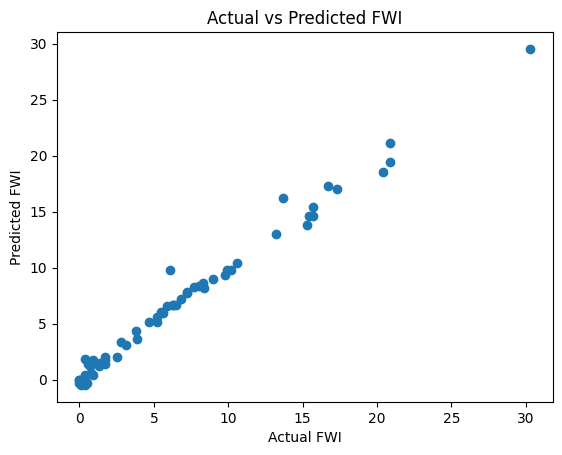

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')      
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')

In [43]:
##Lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso_reg= Lasso()
lasso_reg.fit(X_train_scaled, y_train)
y_pred=lasso_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2 Score:', score)


MAE: 1.133175994914409
R2 Score: 0.9492020263112388


Text(0.5, 1.0, 'Actual vs Predicted FWI')

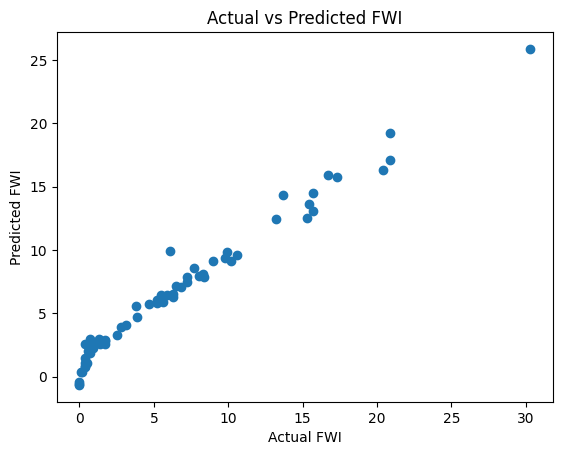

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')      
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted FWI')

MAE: 0.5642305340105715
R2 Score: 0.9842993364555512


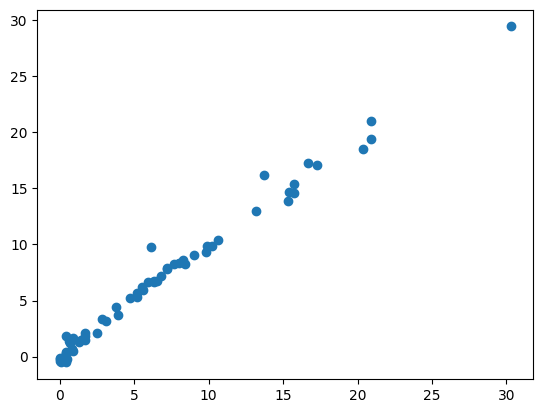

In [45]:
##Ridge regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge()
ridge_reg.fit(X_train_scaled, y_train)    
y_pred=ridge_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred)